# Importing Library 

In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import sys

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('HousingData.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df.dropna(inplace=True)

In [4]:
X = df.iloc[:,:-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [5]:
y = df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [6]:
sceler = StandardScaler()
columns = X.columns
X = sceler.fit_transform(X)
X = pd.DataFrame(X, columns= columns)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [8]:
y_test

336    19.5
340    18.7
142    13.4
7      27.1
414     7.0
       ... 
374    13.8
265    22.8
99     33.2
287    23.2
319    21.0
Name: MEDV, Length: 119, dtype: float64

In [9]:
class Neural_Network:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        self.weight_input_hidden = np.random.uniform(-0.5, 0.5, (hidden_neurons, input_neurons))
        self.weight_hidden_output = np.random.uniform(-0.5, 0.5, (output_neurons, hidden_neurons))
        self.lr = learning_rate

    def activation(self, x):
        return 1 / (1 + np.exp(-x))

    # def forward(self, inputs):
    #     self.inputs = np.array(inputs, ndmin=2).T
    #     hidden_inputs = np.dot(self.weight_input_hidden, self.inputs)
    #     self.hidden_output = self.activation(hidden_inputs)

    #     final_input = np.dot(self.weight_hidden_output, self.hidden_output)
    #     final_output = final_input
    #     return final_output
    
    def forward(self, inputs):
        self.inputs = np.array(inputs, ndmin=2).T
        hidden_input = self.weight_input_hidden @ self.inputs
        self.hidden_output = self.activation(hidden_input)
        final_input = self.weight_hidden_output @ self.hidden_output
        return final_input

    def backward(self, target, predictions):
        output_error = target - predictions
        hidden_gred = np.dot(self.weight_hidden_output.T, output_error) * (self.hidden_output * (1- self.hidden_output))

        self.weight_hidden_output += (self.lr) * output_error * self.hidden_output.T
        self.weight_input_hidden += (self.lr) * hidden_gred * self.inputs.T

    def MSE(self, target, prediction):
        return (np.sum(target - prediction)**2) / len(target) 


In [10]:
x_train.shape[1]

13

In [11]:
input_neurons = x_train.shape[1]
hidden_neurons = 32
output_neurons = 1
learning_rate = 0.2
model = Neural_Network(input_neurons, hidden_neurons, output_neurons, learning_rate)

In [12]:
epochs = 10
losses = {'train':[], 'test':[]}
for epoch in range(epochs):
    batch =np.random.choice(x_train.index,8)

    for features,target in zip(x_train.loc[batch].values,y_train.loc[batch].values):
        # print(features)
        pred = model.forward(features)
        # print(pred)
        model.backward(target, pred)
        
    train_loss = model.MSE(y_train,model.forward(x_train)[0])
    test_loss = model.MSE(y_test,model.forward(x_test)[0])
    # print(test_loss)

    sys.stdout.write("\r Progres: " + str (100 * epoch / float(epochs))[:4] + " %  ...training loss: "+
                      str (train_loss)[:5] + " %  ...testing loss: " + str (test_loss)[:5] + " %") 
    losses['train'].append(train_loss)
    losses['test'].append(test_loss)

 Progres: 90.0 %  ...training loss: 7.220 %  ...testing loss: 3.393 %

In [13]:
reslult = pd.DataFrame()
reslult['Preds'] = model.forward(x_test)[0]
reslult['Actual'] = y_test.values
reslult.head(10)

,Preds,Actual
0,-4.110559e+11,19.5
1,-4.110559e+11,18.7
2,9.250156e+10,13.4
3,-2.947090e+11,27.1
4,1.504370e+11,7.0
5,-3.316834e+11,23.5
6,8.809990e+10,18.0
7,-3.570461e+11,22.1
8,1.504370e+11,13.3
9,1.504370e+11,19.5


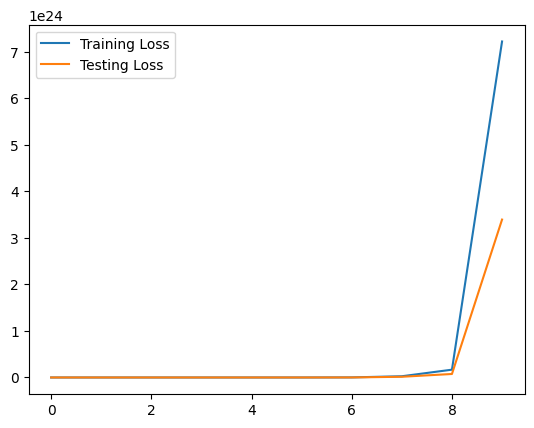

In [15]:
plt.plot(losses['train'], label = 'Training Loss')
plt.plot(losses['test'], label = 'Testing Loss')
plt.legend()
plt.show()